In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_market_data = scaler.fit(market_data_df)
scaled_data = scaler.transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
scaled_market_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)
# check number of columns
print("Number of columns in market_data_df:", market_data_df.shape[1])
print("Number of columns in scaled_market_df:", scaled_market_df.shape[1])

# Copy the crypto names from the original data
    

# Set the coinid column as index
scaled_market_df = scaled_market_df.set_index(market_data_df.index)

# Display sample data
scaled_market_df.head()

Number of columns in market_data_df: 7
Number of columns in scaled_market_df: 7


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = [i for i in range(1, 11)]

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_market_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

   Number of Clusters (k)     Inertia
0                       1  287.000000
1                       2  195.820218
2                       3  123.190482
3                       4   79.022435
4                       5   64.968027
5                       6   52.933559
6                       7   43.219959
7                       8   37.064947
8                       9   32.622136
9                      10   28.222899


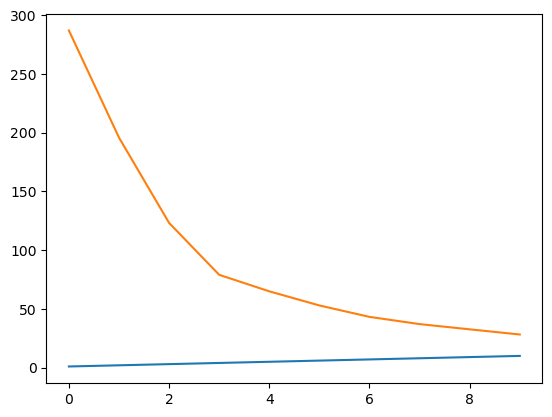

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, n_init=10)

In [9]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_df)

KMeans(n_clusters=3, n_init=10)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_market_df)

# View the resulting array of cluster values.
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [11]:
# Create a copy of the DataFrame
scaled_copy = scaled_market_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
scaled_copy["predicted"] = cluster_labels

# Display sample data
print(scaled_copy)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

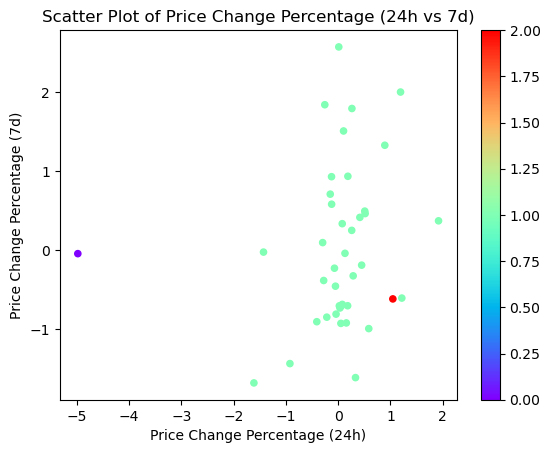

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c=cluster_labels, colormap='rainbow')

# Set plot title and labels
plt.title("Scatter Plot of Price Change Percentage (24h vs 7d)")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")

# Show the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
reduced_df = pca.fit_transform(scaled_market_df)
reduced_df = pd.DataFrame(reduced_df, columns=['PCA1', 'PCA2', 'PCA3'])
# View the first five rows of the DataFrame. 
reduced_df.head()

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance
explained_variance = pca.explained_variance_

# Display the explained variance for each principal component
print("Explained Variance for each Principal Component:")
for i, ev in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ev}")

Explained Variance for each Principal Component:
Principal Component 1: 2.6689967034948534
Principal Component 2: 2.4897833149453565
Principal Component 3: 1.263072120757104


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
reduced_df = reduced_df

# Copy the crypto names from the original data
reduced_df["coin_id"] = scaled_market_df.index

# Set the coinid column as index
reduced_df.set_index('coin_id', inplace=True)

# Display sample data
reduced_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_list = [i for i in range(1,11)]

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_list:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(reduced_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
reduced_elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
reduced_elbow_df = pd.DataFrame(reduced_elbow_data)

# Display the DataFrame
print(reduced_elbow_df)

   Number of Clusters (k)     Inertia
0                       1  256.874086
1                       2  165.901994
2                       3   93.774626
3                       4   49.665497
4                       5   38.072792
5                       6   27.618972
6                       7   21.145312
7                       8   17.091637
8                       9   14.120865
9                      10   10.559358


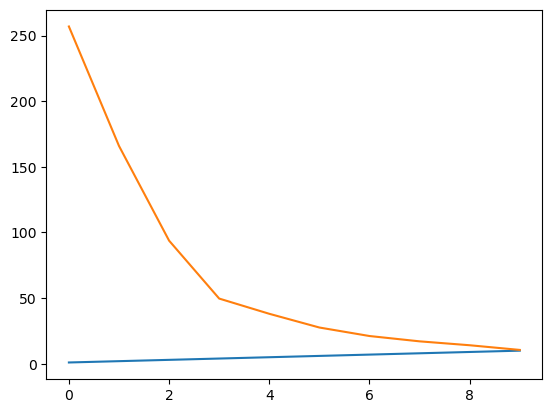

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(reduced_elbow_df)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best answer is 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, n_init=10)

In [21]:
# Fit the K-Means model using the PCA data
kmeans.fit(reduced_df)

KMeans(n_clusters=3, n_init=10)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
reduced_cluster_labels = kmeans.predict(reduced_df)

# Print the resulting array of cluster values.
print(reduced_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [23]:
# Create a copy of the DataFrame with the PCA data
reduced_df_copy = reduced_df.copy()

# Add a new column to the DataFrame with the predicted clusters
reduced_df_copy["predicted"] = reduced_cluster_labels

# Display sample data
reduced_df_copy.head()

,PCA1,PCA2,PCA3,predicted
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

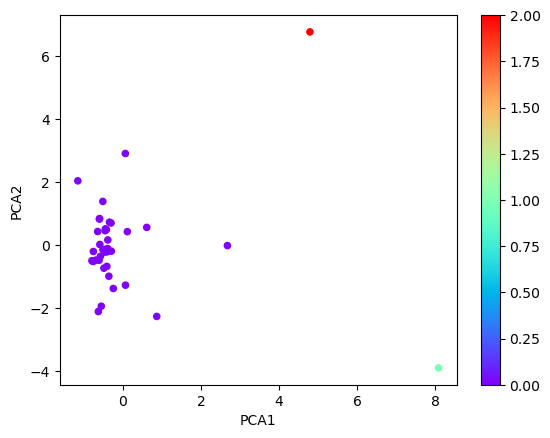

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
reduced_df_copy.plot.scatter(x="PCA1", y="PCA2", c=reduced_cluster_labels, colormap='rainbow')

### Determine the Weights of Each Feature on each Principal Component

In [27]:
# Use the columns from the original scaled DataFrame as the index.
weights = pca.components_
print(weights)

[[-0.41672777 -0.10243154 -0.0091623   0.1915226   0.32036496  0.59446798
   0.56837928]
 [ 0.35816187  0.22743192  0.54041516  0.56218228  0.43403994  0.02773475
  -0.15078941]
 [-0.21879492  0.7876703   0.34953356 -0.18174374 -0.36137707  0.03973325
   0.21054134]]


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** In the first component, the 5th and 6th (0 indexed features have large positive effects. In the second component the 2nd and 3rd (0 indexed) have the largest weights. the 1 in dex in the third component has the largest weight.
    